In [4]:

import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image, read_image_bgr
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.visualization import draw_box, draw_caption
import tensorflow as tf
import matplotlib.pyplot as plt
# import miscellaneous modules
import cv2
import os
import numpy as np
import time
from PIL import Image



model_path = r'../TrainingOutput/snapshots/resnet50_pascal_23.h5'
image_path = r'images/cranetest3.jpg'

model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)



processing time:  0.9364259243011475
Number of cranes:  1
{275.4005: 234.28569, 356.7346: 266.9608}


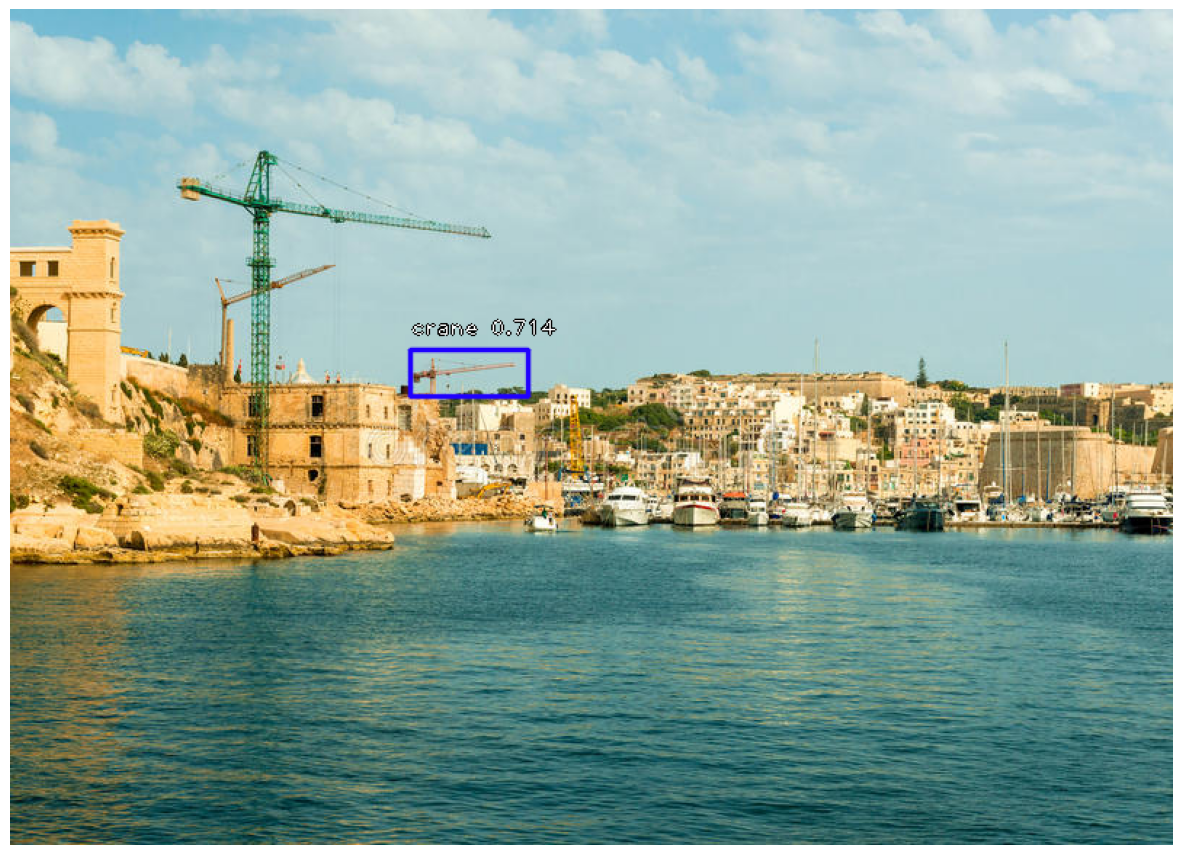

In [9]:
# load image
image = read_image_bgr(image_path)


# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)


# correct for image scale
boxes /= scale
totalnum = []
boxesnum = []

for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < 0.15:
        break
    
    label = label + label
    totalnum.append(score)
    boxesnum.append(box)

numofcranes = len(totalnum)
print("Number of cranes: ", numofcranes)



# Visualize detections
def plotboundingboxes(boxes, scores, labels):
    
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        if score < 0.15:
            break

        color = label_color(label)
        labels_to_names = {0 :'crane'}
        b = box.astype(int)
        draw_box(draw, b, color=color)


        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)


    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(draw)
    
def Convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct

# Converting arrays to dictionaries
arraydict5={}
for i in range(len(boxesnum)):
    arraydict = Convert(boxesnum[i])
    arraydict5.update(arraydict)

print(arraydict5)                        


# Writing bounding boxes to json file
import json
import codecs
json_file = "file.json" 
json.dump(str(arraydict5), codecs.open(json_file, 'w', encoding='utf-8'), sort_keys=True, indent=4)


# If one or more cranes are detected function is called to visualize the bounding boxes
if numofcranes >= 1:
    plotboundingboxes(boxes, scores, labels)

